In [1]:
import matplotlib.pyplot as plt
from utils import Logger
from pathlib import Path
import numpy as np

In [2]:
recent_logfn = []
for fn in Path('./').iterdir():
    if fn.suffix == '.pkl':
        recent_logfn.append(fn)
recent_logfn

[PosixPath('2019-02-14 14:23:11-no-enc-base-mr-longer.pkl'),
 PosixPath('2019-02-15 15:24:14-enc-base-mr-encthresholds_1.5-1.9-longer.pkl'),
 PosixPath('2019-02-12 10:06:52-enc-base-mr-alwaysupdate.pkl'),
 PosixPath('2019-02-15 16:28:46-enc-base-mr-encthresholds_1.3-1.6-longer.pkl'),
 PosixPath('2019-02-12 11:38:50-enc-base-mr-encthresholds_1.5-1.9.pkl'),
 PosixPath('2019-02-11 23:43:08-no-enc-base-mr-101itr.pkl')]

In [3]:
i = 0

2019-02-14 14:23:11-no-enc-base-mr-longer.pkl
Average  encoder_loss nan
Average  internal_rewards 0.032357972
Average  external_rewards 0.0
2019-02-15 15:24:14-enc-base-mr-encthresholds_1.5-1.9-longer.pkl
Average  encoder_loss 1.7474226
Average  internal_rewards -0.056401815
Average  external_rewards 4.1044786840056264e-07


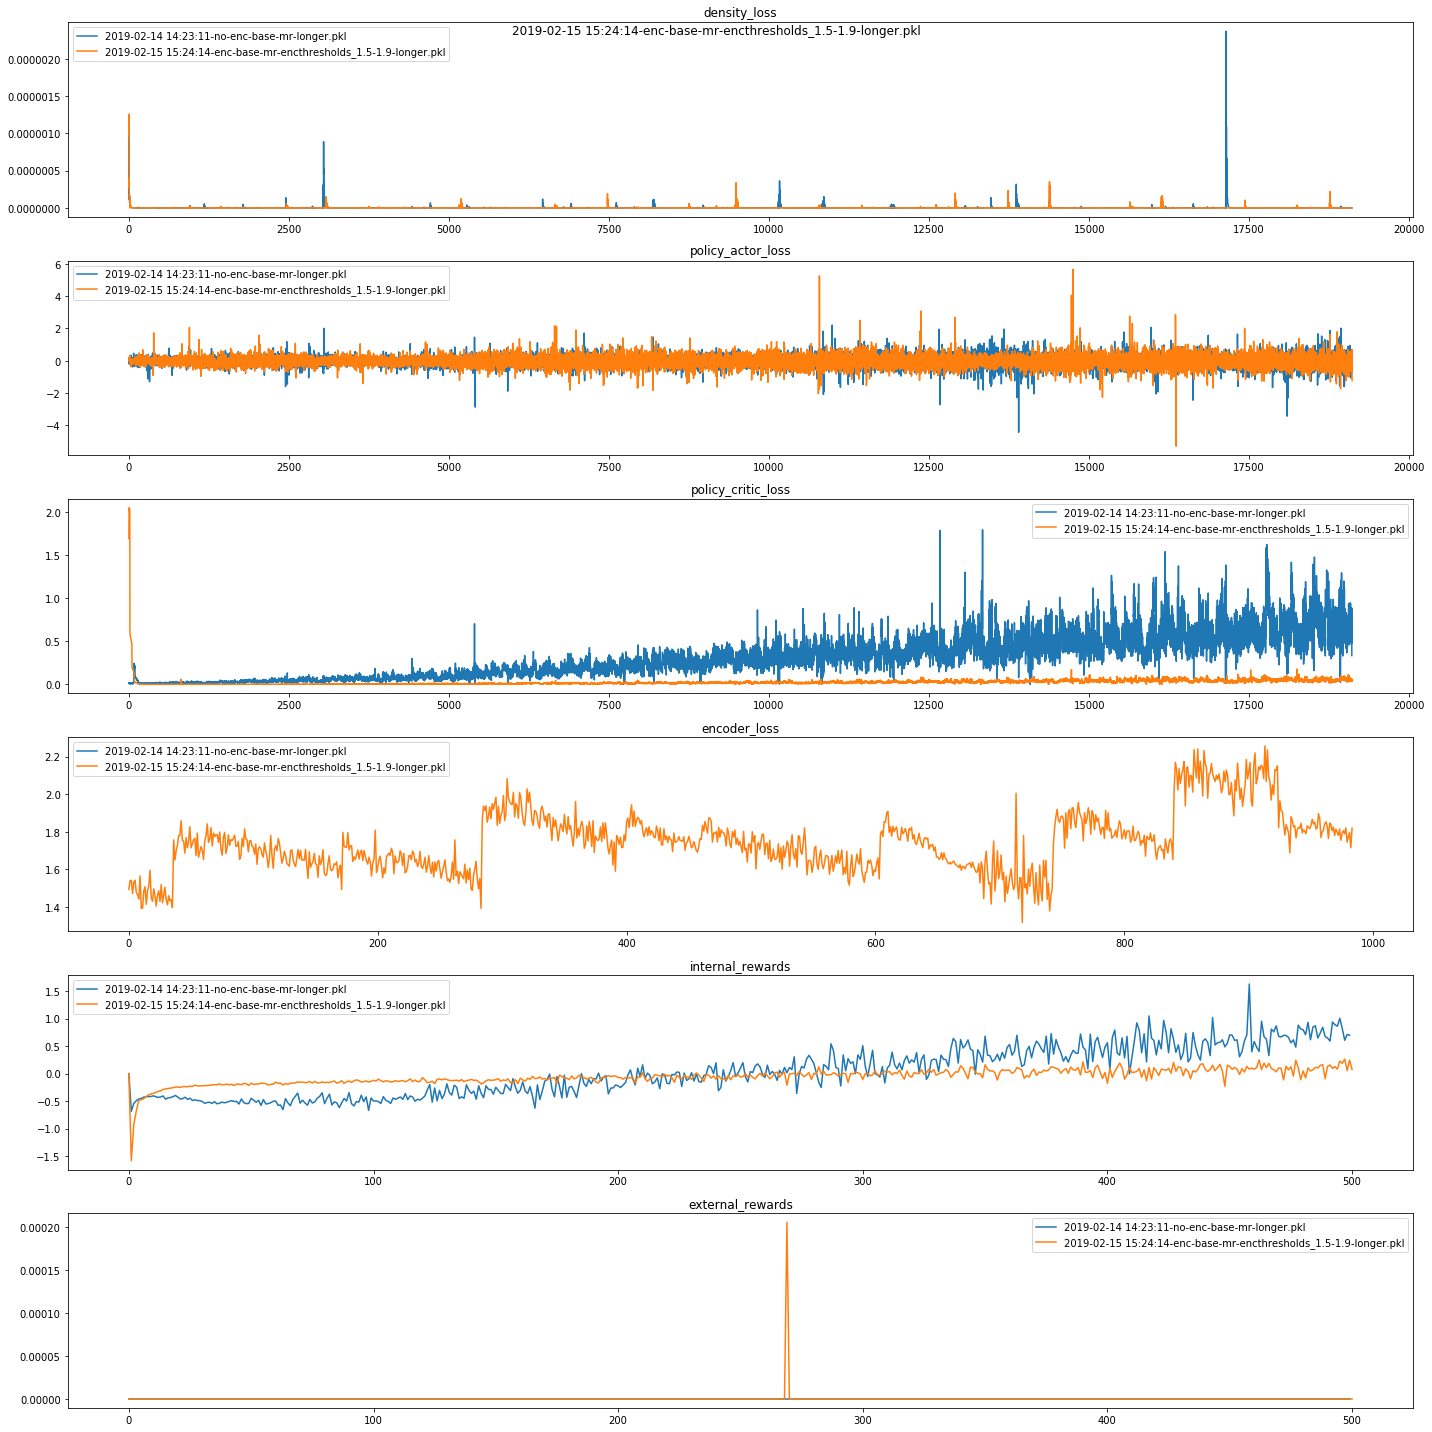

In [6]:
lgr = Logger(max_size=10000)
fig, axs = plt.subplots(6, 1)
fig.set_figheight(20)
fig.set_figwidth(20)

titles = ['density_loss', 'policy_actor_loss', 'policy_critic_loss', 'encoder_loss', 'internal_rewards', 'external_rewards']
fn = recent_logfn[i%len(recent_logfn)]
for fn in recent_logfn[:2]:
    print(fn)
    lgr.import_logs(str(fn))
    logs = [lgr.logs['density']['loss'], 
            lgr.logs['policy']['actor_loss'], 
            lgr.logs['policy']['critic_loss'], 
            lgr.logs['encoder']['loss'],
            lgr.logs['env']['int_rewards'],
            lgr.logs['env']['ext_rewards']]
    for title, log, ax in zip(titles, logs, axs):
        if title in ['internal_rewards', 'external_rewards', 'encoder_loss']: 
            log = [np.mean(l) for l in log]
            print("Average ", title, np.mean(np.array(log)))
        ax.plot(log,label=str(fn))
        ax.set_title(title)

for ax in axs: ax.legend()
fig.tight_layout()
fig.suptitle('{}'.format(fn))
plt.show()
i+=1